# Workshop 4: Demystifying Causality and Causal Inference

https://github.com/Imperial-College-Data-Science-Society/workshops

1. Introduction to Data Science
2. Regression and Neural Networks
3. Classifying Character and Organ Images
4. **Demystifying Causality and Causal Inference**
5. A Primer to Data Engineering
6. Natural Language Processing (NLP) by using Attention
7. Art and Music using GANs
8. Probabilistic Programming in Practice
9. Missing Data in Supervised Learning

## Today ##
You can access the material via:
- Binder
- Local Jupyter Notebook with a suitable virtual environment and dependencies installed
- The PDF slides
- Following my slides on MS Teams

![alt-text](icdss.jpeg)

References I used to prepare this session:

- Past ICDSS workshops
- Dr Jacob Runge's slides on Causal discovery
- Caron et al. 2020, *Estimating Individual Treatment Effects using Non-Parametric Regression Models: a Review*
- Qingyuan Zhao's notes on Causal Inference. Part III Mathematics, Cambridge University.

## Motivation

Consider room temperature and an air conditioner:
- If the air conditioner is on, then room temperature goes up.
- Every day, you toss a fair coin to determine whether to turn on the air conditioner.

**Questions**:
1. Does turning on the air conditioner cause the temperature to go up?
2. Does making te temperature to go up turn the air conditioner on?


## Motivation


Consider room temperature and an air conditioner:
- If the air conditioner is on, then room temperature goes up.
- Every day, you toss a fair coin to determine whether to turn on the air conditioner.


**Questions**:
1. Does turning on the air conditioner cause the temperature to go up?  <span style="color:red">Yes</span>
2. Does making te temperature to go up turn the air conditioner on?  <span style="color:red">No</span>

## Causality and dependence

Let $X = 1$ if air conditioner is on, and 0 otherwise. \
Let $Y = 1$ if room temperature goes up, and 0 otherwise.

**Question:** \
Are $X$ and $Y$ dependent? I.e. Does knowing temperature is up change the probability that air conditioner is on? What about the other direction?

$$
\mathbb{P}(\textrm{temp. up} | \textrm{air cond. on}) = \mathbb{P}(Y = 1 | X = 1)
> \mathbb{P}(Y = 1) = \mathbb{P}(\textrm{temp. up})
$$ 


Similarly,
$$
\mathbb{P}(\textrm{air cond. on} | \textrm{temp. up}) = \mathbb{P}(X = 1 | Y = 1) > \mathbb{P}(X = 1) = \mathbb{P}(\textrm{air cond. on})
$$

Hence, knowing the temperature is up increases the probability that air conditioner is on, and vice versa.

## Causality and dependence

**<span style="color:red">Conclusion:</span>** 
- <span style="color:red">Causal relationship cannot be identified by probability.</span>
- <span style="color:red">Dependence $\neq$ causation.</span>

## Confounding and Randomized Control Trials

**Question**: How can one determine whether a certain vaccine can stop the development of COVID-19?

**Randomized Control Trials (RCT)**: 
Randomly assign subjects to treatment and control groups, so that all factors between the two groups, except whether a treatment is given, are the same.


<img src="graph1.png" alt="graph1" width="300"/>

## Confounding and Randomized Control Trials

**Question**: How can one determine whether a certain vaccine can stop the development of COVID-19?

**Randomized Control Trials (RCT)**:
Randomly assign subjects to treatment and control groups, so that all factors between the two groups, except whether a treatment is given, are the same.

<img src="graph2.png" alt="graph2" width="300"/>

## Confounding and Randomized Control Trials

**Question**: How can one determine whether a certain vaccine can stop the development of COVID-19?

**Randomized Control Trials (RCT)**: 
Randomly assign subjects to treatment and control groups, so that all factors between the two groups, except whether a treatment is given, are the same.

<img src="graph3.png" alt="graph3" width="300"/>

## Confounding and Randomized Control Trials

**Question**: How can one determine whether a certain vaccine can stop the development of COVID-19?

More complex (realistic) senario:
<img src="graph4.png" alt="graph4" width="300"/>

I.e. Use RCT to eliminate all confounders!

## Abstraction of problem:
Let $X$ and $Y$ be two variables. \
Interested in knowing whether $X$ causes $Y$.

**Approach**: \
Experimentally manipulate $X$ while keeping all other variables unchanged, and observe if there is a change to $Y$.

Such Idealized manipulation is called an *intervention* on $X$.

**Example**:
1. Turning air conditioner on makes room temperature up.
2. Making room temperature up does not turn air conditioner on. \

Example of a confounder: weather.

## Challenges

1. In practice, not all confounders are measured.
2. Interaction is often hard, if at all possible, in some applications (e.g. policy making).


Therefore, assumptions are needed to proceed!

# Potential Outcomes Framework and its Assumptions

## Setup

First introduced by the statistician Neyman in 1923, in his Master's thesis.

We have $n$ datapoints $\{(x_i,y_i)\}_{i=1}^n$. The $x_i$'s live in $\mathcal{X}$ and the $y_i$'s in $(-\infty,\infty)$. Alongside the datapoints, we also have **treatment** assignments $z_i=0$ or $1$ to indicate **control** and **treatment** groups. The assignments are done first on populations with covariates $x_i$ and then the responses $y_i$ are recorded. 

## Treatment Assignments

- Completely randomised
- Bernoulli trial
- Other mechanisms

## Unconfoundedness

$(Y_i(0), Y_i(1)) \perp Z_i | X_i$.

The treatment assignments $Z_i$ are determined by the treatment assignment mechanism already, and therefore how the response behaves should not be influenced by the selection of $Z_i$.

## Stable Unit Treatment Value Assumption (SUTVA)

$Y_i = Y_i(z_i)=$
- $Y_i(0)$ if $z_i=0$
- $Y_i(1)$ if $z_i=1$

for $i=1,\ldots,n$. Only 1 outcome can be observed and no interference. Might not hold in the real world.

## Positivity/Common Support

This requires that the treatment assignment mechanism does not deterministically make a selection to 1 group for each $x_i$.

We want to know the  **conditional average treatment effect** (CATE):
$$\tau(x):=\mathbb{E}[Y(1)-Y(1)|X=x]$$

or similarly the **average treatment effect** (ATE):
$$\mathbb{E}[\tau]=\mathbb{E}[Y(1) - Y(0)]$$

# Methods

## Estimating CATE 

Three popular paradigms:
1. Single-learner (S-learner)
2. Two-learners (T-learners)
3. Multitask-learner (brief).


## S-Learner

Use treatment assignment as "just another variable".

Estimate CATE as
$$
\tau(x) = f(x, 1) - f(x, 0),
$$
where $f$ is learned by any machine learning model, e.g. linear regression, random forests, neural nets...

## S-Learner

Advantages:
- Performs well if CATE is of a small magnitude (i.e. close to 0).
- Simple to implement.

Limitations:
- Performs poorly when there is a selection bias, i.e. the distribution of covariates $X$ depends on the treatment.
- Performs poorly when the dependence of $Y$ on $X$ is very different (in terms of smoothness and sparsity) across the treatment and control groups.

## T-Learners

Learning the treatment and control groups separately.

$$
\tau(X) = f_1(x) - f_0(x),
$$
where $f_1$ and $f_0$ are learned by two ML models on the treament and control group, respectively.

## T-Learners

Advantages:
- Preserves the distribution difference across the two groups, thus incorporating selection bias and allowing different degrees of smoothness and sparsity.

Limitations:
- Fitting $f_1$ and $f_0$ separately defies information sharing between the two groups.

## Multitask-Learners

Learning $f_1$ and $f_0$ in T-learners "simultaneously" by using a model called *Causal Multitask Gaussian Process* that allows a joint optimization when learning $f_1$ and $f_0$ [Alaa and van der Schaar 2017].

$$
\tau(x) = f_1(x) - f_0(x).
$$

## Toy Example

Consider the model 
$$
Y_i = 1.5 x_i (1 - Z_i) + (6 - x_i^3 + 2x_i) Z_i + \epsilon_i,
$$
where 
- $i = 1, \ldots, n$, n =100,
- $Y_i$ is the response, $X_i$ is the covariate, $Z_i$ is the binary treatment (0 or 1),
- $\epsilon_i \sim \mathcal{N}(0, 1)$ independent and identically distributed (i.i.d.) is the noise.

We will use linear models to estimate the CATE under the S-learner and T-learners paradigms.


**S-learner**:
$$
Y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + Z_i + \epsilon_i.
$$
**T-learners**:
$$
f_1: Y_i = \beta_{0, 1} + \beta_{1, 1} x_i + \beta_{2, 1} x_i^2 + \beta_{3, 1} x_i^3 + \epsilon_i, \textrm{ for $i$ such that $Z_i = 1$, and}
$$
$$
f_0: Y_i = \beta_{0, 0} + \beta_{1, 0} x_i + \beta_{2, 0} x_i^2 + \beta_{3, 0} x_i^3 + \epsilon_i, \textrm{ for $i$ such that $Z_i = 0$.}
$$

## Simulate data

In [98]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # for reproducibility

n = 100
noise = 1*np.random.normal(size=n)
x = np.linspace(-3, 3, n)
z = np.random.binomial(n=1, p=0.4, size=n)

y = (3 + 1.5*x) * (1 - z) + (20 - x**3 + 8*x) * z + noise


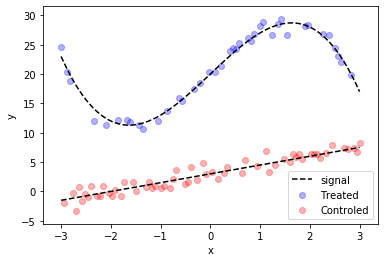

In [104]:
plt.plot(x, 20 - x**3 + 8*x, "k--")
plt.plot(x, 3 + 1.5*x, "k--", label="signal")
plt.scatter(x[z == 1], y[z == 1], color="b", alpha=0.3, label="Treated")
plt.scatter(x[z == 0], y[z == 0], color="r", alpha=0.3, label="Controled")
plt.xlabel("x")
plt.ylabel("y")
_ = plt.legend()

## S-Learner

In [99]:
import statsmodels.api as sm

# build design matrix
X = sm.add_constant(np.array([x, x**2, x**3, z]).T)
print("A peak of the design matrix:\n", X[:5])

A peak of the design matrix:
 [[  1.          -3.           9.         -27.           1.        ]
 [  1.          -2.93939394   8.64003673 -25.3964716    0.        ]
 [  1.          -2.87878788   8.28741965 -23.85772324   1.        ]
 [  1.          -2.81818182   7.94214876 -22.38241923   1.        ]
 [  1.          -2.75757576   7.60422406 -20.96922392   0.        ]]


## S-Learner

In [102]:
# fit s-learner
m = sm.OLS(y, X)
slearner = m.fit()

print(slearner.summary(), "\n sigma~", np.sqrt(sum(slearner.resid**2) / (100 - 4)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     385.3
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           8.84e-58
Time:                        22:17:47   Log-Likelihood:                -229.54
No. Observations:                 100   AIC:                             469.1
Df Residuals:                      95   BIC:                             482.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2642      0.436      7.488      0.0

## S-Learner

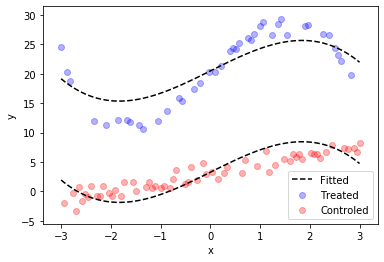

In [116]:
# get the fitted function for each group
X1_plot = np.array([np.ones(n).T, x, x**2, x**3, np.ones(n)]).T
X0_plot = sm.add_constant(np.array([x, x**2, x**3, np.zeros(n)]).T)

y1_s = slearner.predict(X1_plot)
y0_s = slearner.predict(X0_plot)

# plots
plt.plot(x, y1_s, "k--")
plt.plot(x, y0_s, "k--", label="Fitted")
plt.scatter(x[z == 1], y[z == 1], color="b", alpha=.3, label="Treated")
plt.scatter(x[z == 0], y[z == 0], color="r", alpha=.3, label="Controled")

plt.xlabel("x")
plt.ylabel("y")
_ = plt.legend()

## T-Learners

In [117]:
# build design matrices
X1 = sm.add_constant(np.array([x, x**2, x**3]).T)[z == 1, :]
X0 = sm.add_constant(np.array([x, x**2, x**3]).T)[z == 0, :]

# fit T-learners
m1 = sm.OLS(y[z == 1], X1)
tlearner1 = m1.fit()

m0 = sm.OLS(y[z == 0], X0)
tlearner0 = m0.fit()

## T-Learners

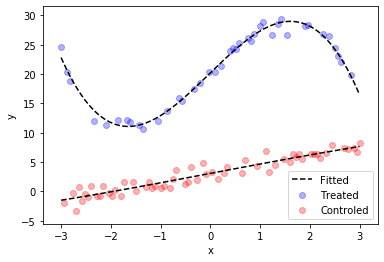

In [118]:
# get the fitted function for each group
X1_plot = np.array([np.ones(n).T, x, x**2, x**3]).T
X0_plot = sm.add_constant(np.array([x, x**2, x**3]).T)

y1_t = tlearner1.predict(X1_plot)
y0_t = tlearner0.predict(X0_plot)

plt.plot(x, y1_t, "k--")
plt.plot(x, y0_t, "k--", label="Fitted")
plt.scatter(x[z == 1], y[z == 1], color="b", alpha=.3, label="Treated")
plt.scatter(x[z == 0], y[z == 0], color="r", alpha=.3, label="Controled")

plt.xlabel("x")
plt.ylabel("y")
_ = plt.legend()

## Estimate CATE
Quantify estimation error in terms of MAPE: 
$$
M = \frac{1}{n} \sum_{i = 1}^{n}\frac{|\tau(x_i) - \hat{\tau}(x_i)|}{| \tau(x_i) |}.
$$

In [119]:
# true CATE
cate_true = (20 - x**3 + 8*x) - (3 + 1.5*x)

# S-learner estimates
cate_s = y1_s - y0_s
mape_s = np.sum(np.abs((cate_true - cate_s) / (cate_true)))

# T-learners estimates
cate_t = y1_t - y0_t
mape_t = np.sum(np.abs((cate_true - cate_t) / (cate_true)))

print("S-learner  MAPE: {} \nT-learners MAPE: {}".format(mape_s, mape_t))

S-learner  MAPE: 27.000975283031686 
T-learners MAPE: 1.0928322472952854


Thank you for your attention! 

https://github.com/Imperial-College-Data-Science-Society/workshops

1. Introduction to Data Science
2. **Regression and Neural Networks**
3. Classifying Character and Organ Images
4. Demystifying Causality and Causal Inference
5. A Primer to Data Engineering
6. Natural Language Processing (NLP) by using Attention
7. Art and Music using GANs
8. Probabilistic Programming in Practice
9. Missing Data in Supervised Learning

![alt-text](icdss.jpeg)
